In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [88]:
from IPython import display

%matplotlib inline

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [96]:
def iterate_minibatches(x, y, batchsize, shuffle=True):
    if shuffle:
        indices = np.arange(x.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, x.shape[0] - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield x[excerpt], y[excerpt]

In [3]:
INPUT_SHAPE = (14, 14)

In [72]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv_1 = nn.Conv2d(1, 8, (3,3))
        self.max_p_1 = nn.MaxPool2d((2,2))
        self.conv_2 = nn.Conv2d(8, 16, (3,3))
        self.max_p_2 = nn.MaxPool2d((2,2))
        
        self.linear = nn.Linear(64, 2)
       

    def forward(self, x):
        x = self.conv_1(x)
        x = F.relu(x)
        x = self.max_p_1(x)
        x = self.conv_2(x)
        x = F.relu(x)
        x = self.max_p_2(x)
        
        x = x.reshape(-1, 64)
        x = self.linear(x)
        x = F.softmax(x)
        return x


net = Net()
print(net)

Net(
  (conv_1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (max_p_1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (max_p_2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=64, out_features=2, bias=True)
)


In [44]:
import pandas as pd

data = pd.read_csv("../6.Intro_to_NN/data/train.csv")

x_all = data[data.columns[1:]].values
y_all = data[data.columns[0]].values

In [45]:
mask = np.logical_or(y_all == 4, y_all == 8)

In [137]:
x,y = x_all[mask], y_all[mask]

In [138]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y = ohe.fit_transform(y.reshape(-1, 1)).toarray()

In [139]:
x = x.reshape(-1, 28,28)[:,::2,::2]

In [140]:
from sklearn.model_selection import train_test_split

x_tr, x_te, y_tr, y_te = train_test_split(x, y)

In [141]:
x_tr = torch.from_numpy(x_tr.astype(np.float32))
x_te = torch.from_numpy(x_te.astype(np.float32))
y_tr = torch.from_numpy(y_tr.astype(int))
y_te = torch.from_numpy(y_te.astype(int))

In [142]:
x_tr = x_tr.reshape(x_tr.shape[0], 1, 14, 14)
x_te = x_te.reshape(x_te.shape[0], 1, 14, 14)

In [143]:
net(x_tr[:1])

/home/anton/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[1.0000e+00, 1.1308e-22]], grad_fn=<SoftmaxBackward>)

In [144]:
criterion = nn.CrossEntropyLoss()

In [145]:
from torch.optim import Adam


In [146]:
adam = Adam(net.parameters(), lr = 0.001, betas = (0.9, 0.998))

In [147]:
train_losses = []
val_losses = []


In [148]:
epochs = 50

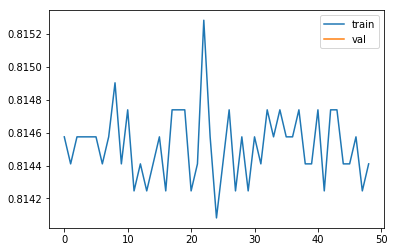

KeyboardInterrupt: 

In [158]:

for epoch in range(epochs):
    batch_losses = []
    for i, (batch_x, batch_y) in enumerate(iterate_minibatches(x_tr, y_tr, 16)):
        #batch_x, batch_y = load_batch(batch_names)
        
#         #batch_x = wrap_batch(batch_x)
#         batch_x = wrap_batch(np.asarray(augmentate_batch(batch_x)))
        
#         batch_x = torch.tensor(batch_x , requires_grad=False, dtype=torch.float32).cuda()
#         batch_y = torch.tensor(batch_y, requires_grad=False, dtype=torch.long).cuda()
        
        out = net(batch_x)
        target = batch_y

        adam.zero_grad()
        loss = criterion(out, target[:,0])

        loss.backward()
        adam.step()
        
        #grad_norm.append(rn.fc.weight.grad.cpu().detach().numpy())
        
        batch_losses.append(loss.item())

    train_losses.append(np.mean(batch_losses))
    
#     curr_val_losses = []
#     for name in test_cv_names[:]:
#         x, y = load_batch([name])
#         x = torch.tensor(wrap_batch(x), requires_grad=False, dtype=torch.float32).cuda()
#         y = torch.tensor(y, requires_grad=False, dtype=torch.long).cuda()
#         curr_val_losses.append(criterion(rn(x), y).item())
    
#     val_losses.append(np.mean(curr_val_losses))

    
#     print("train", train_losses[-1])
#     print("val", val_losses[-1])
    
    display.clear_output(wait=True)
    plt.plot(train_losses, label='train')
    plt.plot(val_losses, label='val')
    #plt.plot([i * train_adjs.shape[0] for i in range(1, len(test_losses) + 1)], test_losses, label='train')
    plt.legend()
    plt.show()

In [166]:
batch_x[0].numpy().shape

(1, 14, 14)

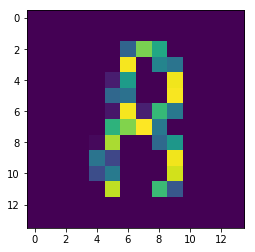

In [173]:
plt.imshow(batch_x[5][0].numpy())

In [171]:
batch_y

tensor([[1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0]])